<h3 style="margin-bottom:0">Import Libraries</h4>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy as scipy
from scipy import stats
from scipy.stats import norm
from scipy.stats import chisquare

<h3 style="margin-bottom:0">a) Pokemon Data</h3>

<h4 style="margin-bottom:0">1) Import Data</h4>

For understanding pyplot and seaborn libraries, we will be utilizing a dataset that is prepared for this exercise. This dataset shows fictional sales of pokemon plush toys in a year for a company. Individual elements are:

<ul>
<li>Month: month, 1 indicates January and 12 indicates December</li>
<li>Charmander, squirtle ...., snorlax: how many pokemon toys of that type is sold (in thousands)</li>
<li>Total: total amount of plush sold (in thousands)</li> </ul>


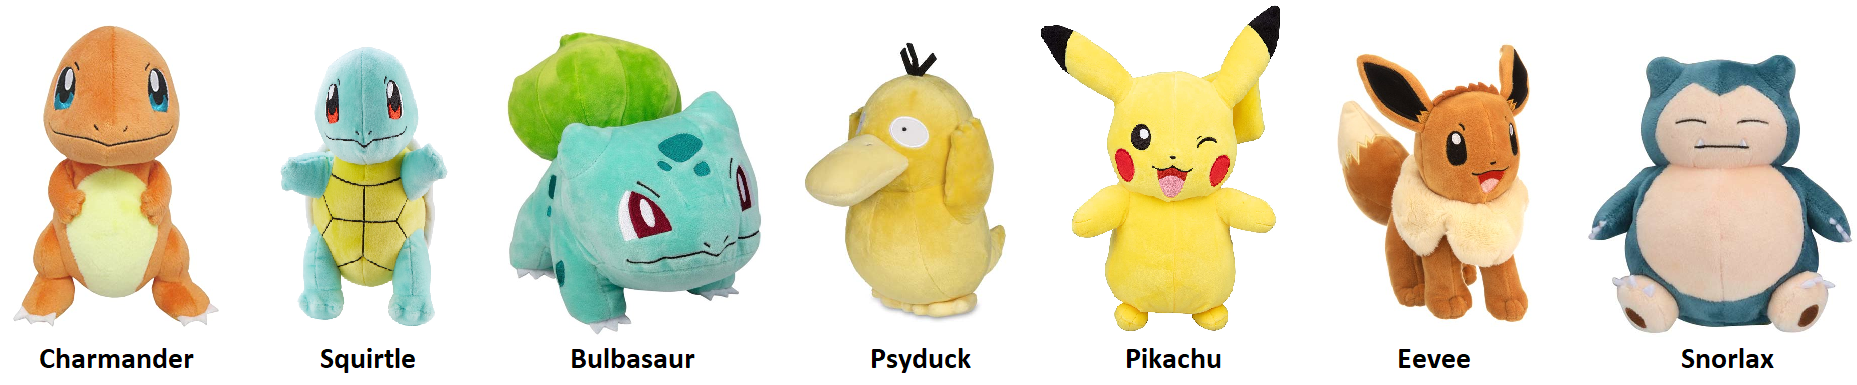

In [27]:
df = pd.read_csv('C:\\Users\Gizem\Files\pokemon.csv', sep=';')

In [28]:
df.head()

,month,charmander,squirtle,bulbasaur,psyduck,pikachu,eevee,snorlax,total
0,1,845,501,699,750,898,404,737,4834
1,2,840,442,669,701,530,477,677,4336
2,3,892,480,628,542,885,407,812,4646
3,4,734,542,600,448,510,432,474,3740
4,5,785,462,584,556,847,487,820,4541


In [33]:

def f(dat, c='red'):
    return [f'background-color: {c}' for i in dat]

pokemon_colors = {'charmander': 'orange', 'squirtle': 'cyan', 'bulbasaur':'cyan', 'psyduck': 'yellow', 'pikachu': 'yellow', 'eevee': 'orange', 'snorlax': 'blue'}
style = df.style
for column, color in pokemon_colors.items():
    style = style.apply(f, axis=0, subset=column, c=color)
style

,month,charmander,squirtle,bulbasaur,psyduck,pikachu,eevee,snorlax,total
0,1,845,501,699,750,898,404,737,4834
1,2,840,442,669,701,530,477,677,4336
2,3,892,480,628,542,885,407,812,4646
3,4,734,542,600,448,510,432,474,3740
4,5,785,462,584,556,847,487,820,4541
5,6,630,502,494,808,864,408,597,4303
6,7,570,567,455,558,503,401,568,3622
7,8,631,480,428,642,873,452,609,4115
8,9,406,509,420,595,435,483,514,3362
9,10,540,488,419,401,813,450,762,3873


<h4 style="margin-bottom:0">2) Problems</h4>

<h5 style="margin-bottom:0">a. Show the product sales of each month  using a multiline plot.</h5>

Show the individual product sales of each month  using multiple line plots.

Tailor all of the figures, titles and fonts big enough, so it can be read easily.</b>
Resize figures for a better visualization, tailor the space of the legend by using "yticks" or "xticks"

</b></i></p>

</b> Choose different types of lines and markers at all times for the readability in black and white.</i></p>

 

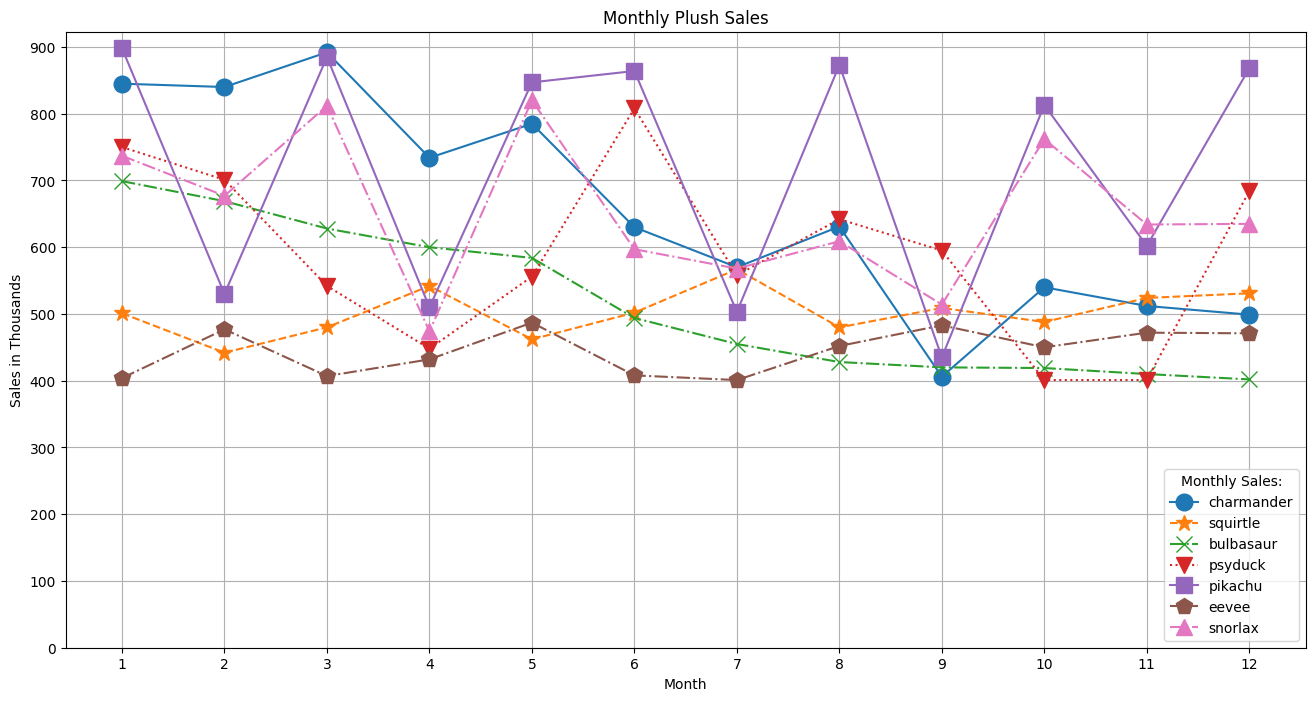

In [51]:
# lets firstly define different linestyles and marker types to use:
line = ['-', '--', '-.', ':', '-', '-.', '-.']
marker = ['o', '*', 'x', 'v', 's', 'p', '^']

#in order to use in string iteration: 
line2 = range(len(line))
marker2 = range(len(marker))

#arrange figure size:
plt.figure(figsize=(16, 8)) 

for col, l, m in zip(df.columns, line2, marker2):
    if not col == 'total': # I do not want to show the total amount in the graph
        plt.plot(df.index, df[col], linestyle=line[l], marker=marker[m], markersize=12, label=col)
        plt.title("Monthly Plush Sales")
        plt.xlabel("Month")
        plt.ylabel("Sales in Thousands")
        plt.grid(True)

plt.legend(title='Monthly Sales:', loc="lower right")
plt.yticks(np.arange(0, 1000, step=100)) # want to see y axis starting from 0 and also place the legend not cross with any line
plt.xticks(np.arange(1, 13, step=1)) # wanted to see each month ticks in x axis
plt.show()


<h5 style="margin-bottom:0">b. Show all squirtle and bulbasaur pelush sales and show them in a bar chart.</h5>

Show squirtle and bulbasaur pelush sales of all months by using a bar chart. Name labels properly and add a legend to indicate which color corresponds to which one.

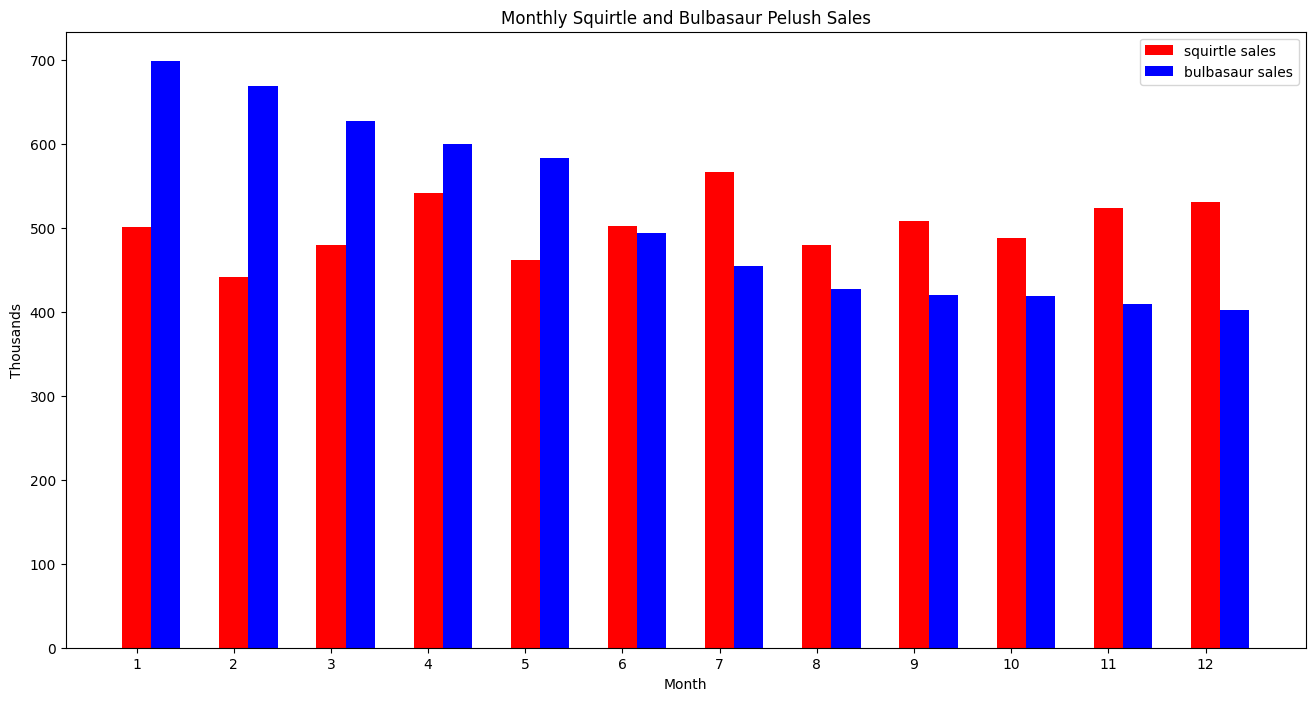

In [53]:
x= df.index #months to x axis

w=0.3 #width value

plt.figure(figsize=(16, 8))
plt.bar(x, df["squirtle"], color='red', label = 'squirtle sales', width=w)
plt.bar(x+w, df["bulbasaur"], color="blue", label= 'bulbasaur sales', width=w)

plt.title("Monthly Squirtle and Bulbasaur Pelush Sales")
plt.xlabel("Month")
plt.ylabel("Thousands")

plt.legend(loc="best")
plt.xticks(np.arange(1, 13, step=1))
plt.show()



<h5 style="margin-bottom:0">c. By using "subplots", show pikachu and eevee sales by months in a single, bisected graph. </h5>

Show pikachu and eevee pelush sales of all months by using a subplot with line charts. Also, name your labels properly. Be sure that "y" labels of your two graphs are the same.

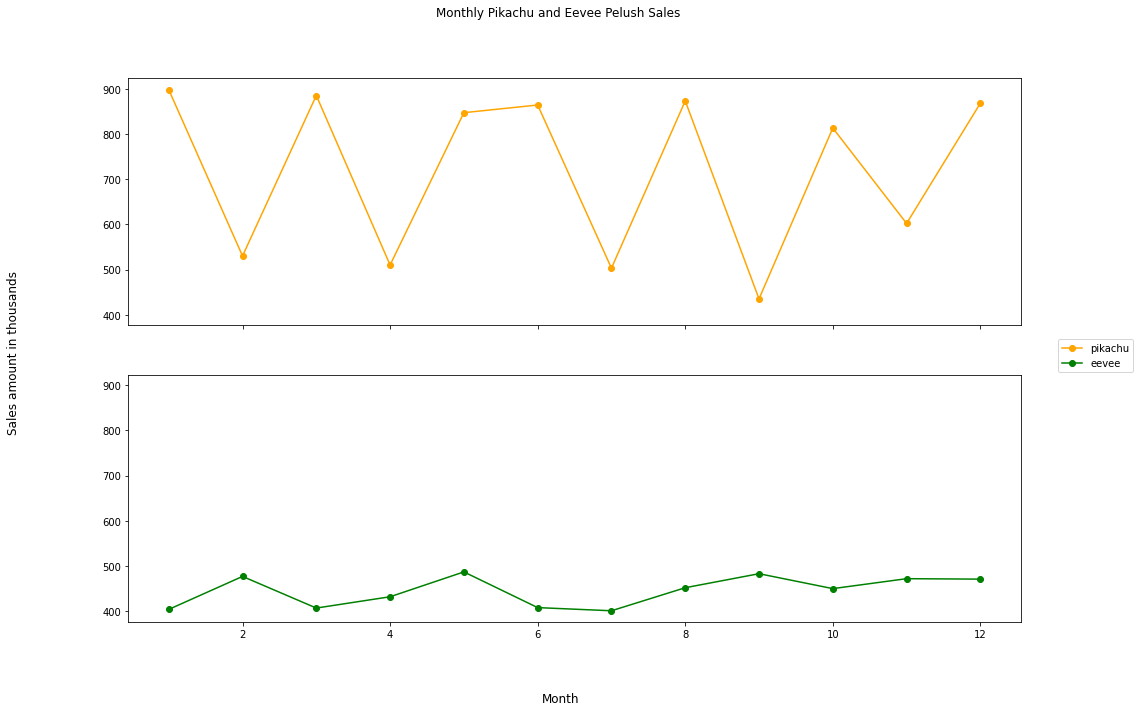

In [5]:
fig, axs = plt.subplots(ncols=1, nrows=2, sharex=True, sharey=True, figsize=(16,10))
fig.suptitle('Monthly Pikachu and Eevee Pelush Sales ')
fig.supxlabel('Month')
fig.supylabel('Sales amount in thousands')

axs[0].plot(df.index, df['pikachu'], label='pikachu', color='orange', marker='o')
axs[1].plot(df.index, df['eevee'], label='eevee', color='green', marker='o')
fig.legend(loc= 'center right')

<h5 style="margin-bottom:0">d. By using a pie chart, show number of units sold in the year for each pelush in percentages. </h5>

By using a pie chart, show total pelushes sold for each product in percentages. Offset the slice with the highest percentage by using "explode" property of pie chart.

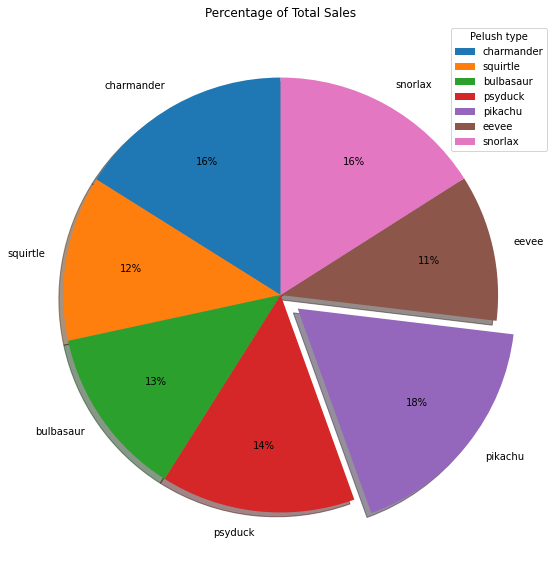

In [6]:
#exclude the total column for calculation purpose
pelush_sales= df.drop('total', inplace=False, axis=1)

#Lets sum all months' sales for all pokemon pelushes (It was also possible to use total, but I preferred this way)
sum_sales = pelush_sales.sum(axis = 0)

#define labels as pokemon names
labels = sum_sales.index

fig = plt.figure(figsize=(10,10))
plt.style.use('default')
plt.pie(sum_sales, labels=labels, explode=(sum_sales == max(sum_sales)) * 0.1, autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1, startangle=90, shadow=True)
plt.title("Percentage of Total Sales")
plt.legend(labels, title='Pelush type', loc="best")


<h3 style="margin-bottom:0">b) Popcorn Data</h3>

<h4 style="margin-bottom:0">1) Import Data</h4>

This dataset shows fictional sales of popcorn in a fictional cinema and potential sales drivers. Elements are:

<ul>
<li>Popcorn: total amount of popcorn sold (in Turkish Liras).</li>
<li>Age: age of the buyer.</li>
<li>Gender: gender of the buyer (can be M or F).</li>
<li>DayTime: time of the purchase (can be morning, noon, evening or night).</li>
<li>Children: number of children the buyer have with.</li>
<li>Genre: genre of the movie (can be fantasy, horror, action, drama, comedy or animation).</li>

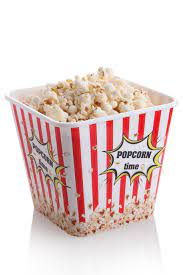

In [46]:
pc = pd.read_csv('C:\\Users\GİZEM\Files\cinema.csv', sep=';')
pc.head(5)

,popcorn,age,gender,dayTime,children,genre
0,27,19,F,Night,None,Fantasy
1,24,20,M,Evening,None,Horror
2,8,23,M,Night,None,Action
3,34,24,F,Evening,None,Fantasy
4,27,19,M,Night,None,Action


<h4 style="margin-bottom:0">2) Problems</h4>

<h5 style="margin-bottom:0">a. Interpret the data with appropriate descriptive statistics.</h5>

In [47]:
#Numerical variables are popcorn and age. Lets look at them first
pc.describe()

# For popcorn:
# Mean (28.50500) > Median (28.000000) --> mean and median values are really close, therefore it may be symmetrical distribution.
# Lets look other values to be sure:
# Q1=24.00000, Q2=28.00000, Q3=33.25000 --> Q3-Q2 (~5.25) > Q2-Q1 (4) could be right skewed but the difference is again really close, so it is better to check with plot.
# When I checked the graph in the upcoming question, we can clearly see it is bell-shaped.
# Standard deviation is 7.40433 --> about dispersion: it is not too high or low, it neither widely spreaded nor narrowed around mean
# Mean value is really close to median value, and min & max values do not look extreme, so we can guess the data do not include outliers. 

# For age:
# Mean (23.535000) < Median (26.000000) ; so it is probably left skewed
# Lets look other values to be sure:
# Q1=20.000000, Q2=24.000000, Q3=26.000000 --> Q3-Q2 < Q2-Q1 and also;
# Mean-Min (5.535000) < Max-Mean (21.465000)  --> the difference is very obvious so we can say that the popcorn data is left skewed.
# Standard deviation is 4.256686 --> it is not too high or low, it neither widely spreaded nor narrowed around mean. (It is narrower than popcorn data, though.)
# Mean value is really close to median value, and min & max values do not look extreme, so we can guess the data do not include outliers. 

# Coefficient of variation (S/Mean*100) for popcorn is 25.97
# Coefficient of variation (s/Mean*100) for age is 18.086
# Age is less variable than popcorn

,popcorn,age
count,200.00000,200.000000
mean,28.50500,23.535000
std,7.40433,4.256686
min,5.00000,18.000000
25%,24.00000,20.000000
50%,28.00000,24.000000
75%,33.25000,26.000000
max,49.00000,45.000000


In [50]:
#get the categorical columns of popcorn data

pc_cat =pc[['gender','dayTime', 'children', 'genre']]

#Find percentages of each categorical value in its own column

def percentages(data):
    my_columns =list(data)
    a = range(len(my_columns))
    for i in a:
        col = my_columns[i]
        per = (data[col].value_counts()/data[col].count())*100
        print(my_columns[i] + ':')
        print(per)

percentages(pc_cat)

gender:
M    52.5
F    47.5
Name: gender, dtype: float64
dayTime:
Evening    45.0
Night      29.5
Noon       16.0
Morning     9.5
Name: dayTime, dtype: float64
children:
None           73.0
Only one       14.0
More than 1    13.0
Name: children, dtype: float64
genre:
Action       30.0
Fantasy      28.0
Horror       13.0
Comedy       12.0
Drama         9.0
Animation     8.0
Name: genre, dtype: float64


In [10]:
# we can say:
#M and F ratios are really close to buy popcorn.
#In evening (and secondly at night) people are more likely to buy popcorn.
#People do not have children are are highly possible than others to buy popcorn data (74%)
#Buyers who watches action and fantasy movies have higher posssibility to buy popcorn


<h5 style="margin-bottom:0">b. Visualize the distributions of the numeric attributes.</h5>

Visualize numeric variables ato understand the distributions. Lets try different bin numbers and determine a proper amount of bin. Lets add draw normal curves on histograms.

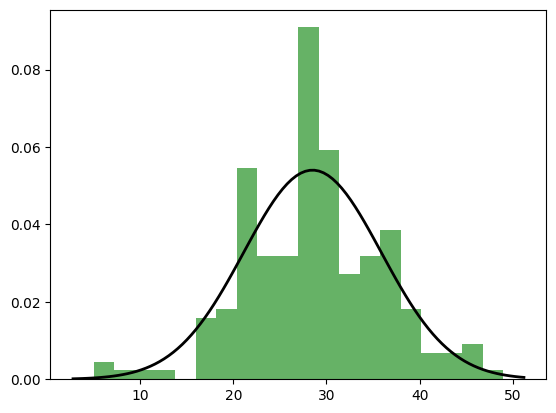

For popcorn p value:0.000000
For normal array p value:0.523631


In [55]:
# sns.distplot(pc['popcorn'], kde=False, label='samples', fit=norm)
# I used distplot at first but learned it will be deprecated unfortunately :(
# Therefore, I switched to histplot:

# plt.hist(data, bins=30, density=True, alpha=0.6, color='g') 
# --> I should use a lower bin value to see the distribution properly
# plt.hist(data, bins=10, density=True, alpha=0.6, color='g')
# --> I should use a greater bin value to see the distribution properly

data_popcorn = pc['popcorn']
mu, std = norm.fit(data_popcorn)

# Plot the histogram.
plt.hist(data_popcorn, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

# The data looks like not normally distributed from the graph, but lets check with statistical tests:
# Since n=200 (greater than 100),I will apply Kolmogorov-Smirnov test

normal_array = np.random.normal(0, 1, 200)
test_stat_ks_a1, p_value_ks_a1=stats.kstest(data_popcorn, cdf="norm")
test_stat_ks_a2, p_value_ks_a2=stats.kstest(normal_array, cdf="norm")
print("For popcorn p value:%.6f" % p_value_ks_a1)
print("For normal array p value:%.6f" % p_value_ks_a2)

# Since p-value for popcorn data < 0.05, we can say popcorn data is not normally distributed

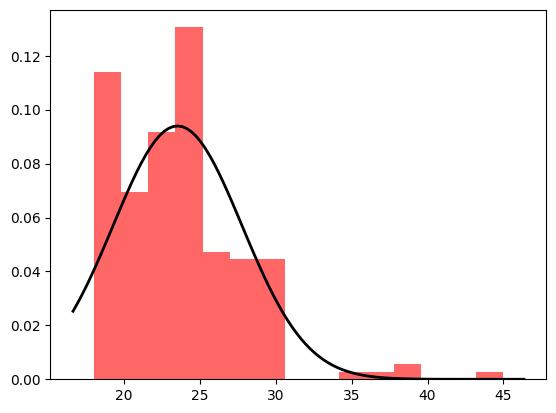

For age data p value:0.000000
For normal array p value:0.657933


In [22]:
# plt.hist(data, bins=25, density=True, alpha=0.6, color='g') 
# --> I should use lower bin value to see the distribution properly
# plt.hist(data, bins=10, density=True, alpha=0.6, color='g')
# --> I should use greater bin value to see the distribution properly

data_age = pc['age']
mu, std = norm.fit(data_age)

# Plot the histogram.
plt.hist(data_age, bins=15, density=True, alpha=0.6, color='r')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

# The data looks like not normally distributed from the graph, but lets check with statistical tests:
# Since n=200 (greater than 100),I will apply Kolmogorov-Smirnov test

normal_array = np.random.normal(0, 1, 200)
test_stat_ks_a1, p_value_ks_a1=stats.kstest(data_age, cdf="norm")
test_stat_ks_a2, p_value_ks_a2=stats.kstest(normal_array, cdf="norm")
print("For age data p value:%.6f" % p_value_ks_a1)
print("For normal array p value:%.6f" % p_value_ks_a2)

# Since p-value for age data < 0.05, we can say age data is not normally distributed


In [13]:
# Since p-values for both popcorn and age data is less than 0.05, we can say they are not normally distributed

<h5 style="margin-bottom:0">c. For categoric attributes, draw countplots.</h5>

Create our own palette of different shades of gray (ranging from black to white). Then use those palettes to create our own countplots.

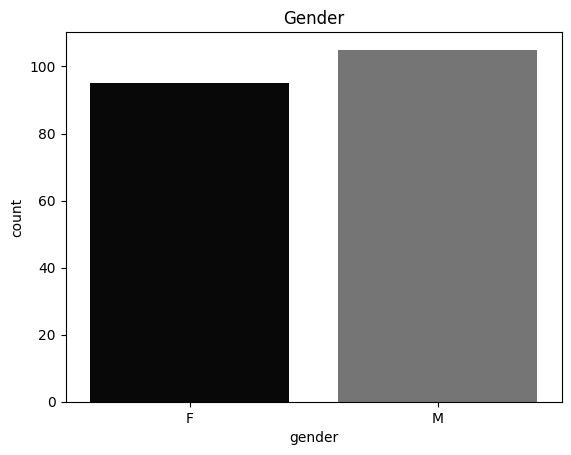

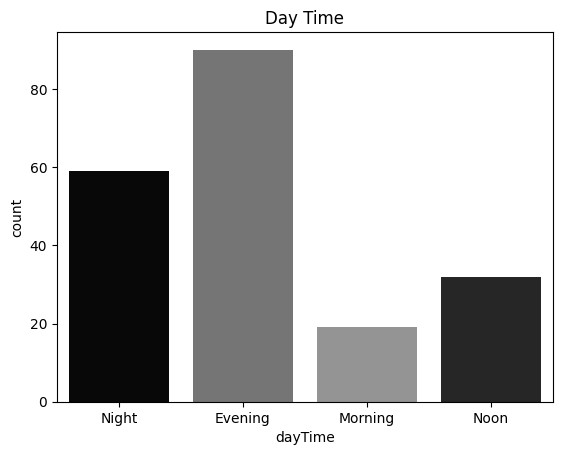

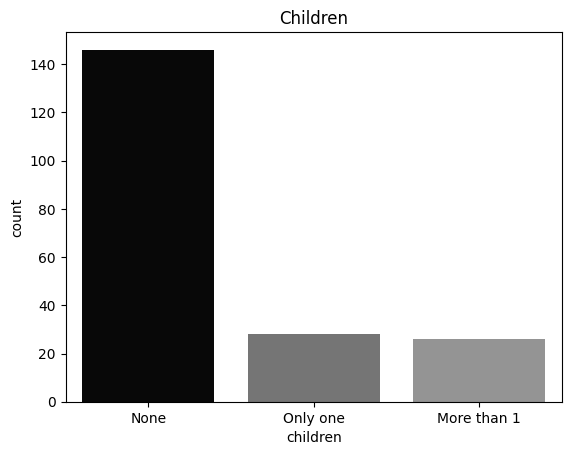

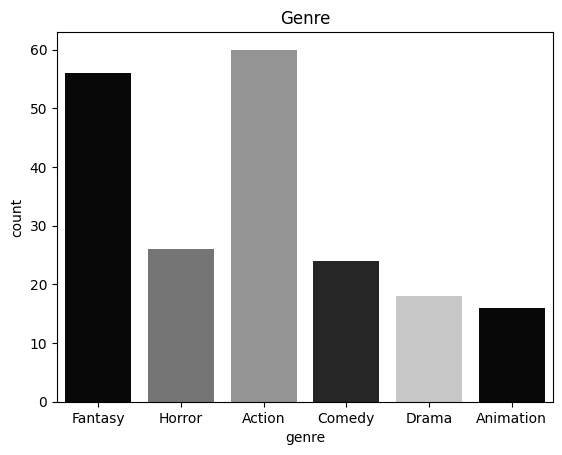

In [53]:
# Lets create the gray palette:
Plt = ["#080808", "#757575", "#949494", "#262626","#C7C7C7"]
sns.set_palette(sns.color_palette(Plt))

# countplot for gender:
ax_gender = sns.countplot(x=pc['gender'], data=pc, palette=Plt)
plt.title("Gender")
plt.show()

# countplot for dayTime
ax_dayTime = sns.countplot(x=pc['dayTime'], data=pc, palette=Plt)
plt.title("Day Time")
plt.show()

# countplot for children:
ax_children = sns.countplot(x=pc['children'], data=pc, palette=Plt)
plt.title("Children")
plt.show()

# counplot for genre:
ax_children = sns.countplot(x=pc['genre'], data=pc, palette=Plt)
plt.title("Genre")
plt.show()

In [74]:
# We can say for the popcorn sales
# Gender dist. looks like uniform. The female and male possibilty to buy popcorn almost equal.
# Morning and noon are less preferred than evening and night time to buy popcorn
# People with "no children" looks relatively dominant, while "only one children" and "more than 1 children" possibility to buy popcorn is low.
# Fantasy and action genre are watched more frequently than others.

<h5 style="margin-bottom:0">d. Show the violinplots of age variable, based on genre. </h5>

Draw violinplots of age variable based on genre. Make the plots <b> horizontal </b>. Add every single individual points in the images.

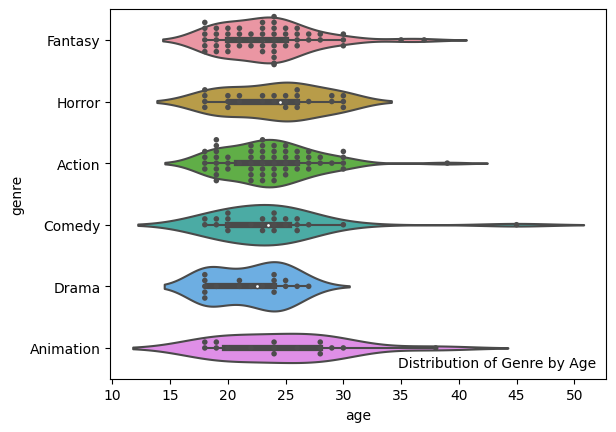

In [73]:
ax = sns.violinplot(x=pc["age"], y=pc["genre"], data=pc)
ax = sns.swarmplot(x=pc["age"], y=pc["genre"], data=pc, size=4, color='.3')
ax.text(0.98, 0.06, "Distribution of Genre by Age", ha="right", va="top", transform=ax.transAxes) #add a description to figure

plt.show()

<h5 style="margin-bottom:0">e. Draw a heatmap of correlations (numerical variables) in our dataset. </h5>

Draw a heatmap of correlations by using seaborn. Set DPI to 1200. Interpret the correlation coefficient between age and popcorn sales. Save the image on computer as a PNG file as well.

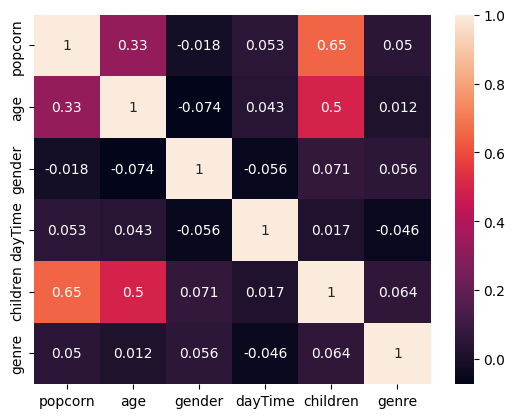

In [57]:
# corr_matrix = pc.corr().abs() simply did not work since some of the columns are categorical
# therefore I will use pd.factorize() for these categorical columns to find correlation

pc_str = pc[['gender','dayTime','children','genre']]

pc_str_factor=pc_str.apply(lambda x : pd.factorize(x)[0])+1
pc_factor = pc[['popcorn','age']].join(pc_str_factor)
pc_factor

#find correlation matrix
pc_correlation = pc_factor.corr(method='pearson')

sns_plot = sns.heatmap(pc_correlation, annot=True)
sns_plot.figure.savefig('Popcorn Correlation Heatmap.png', dpi=1200)

In [18]:
# We can say children data and popcorn sales has a correlation (0,65 correlation coefficient)
# Also children data and age has a correlation (0,5 correlation coefficient)
# Correlation coeefficient of age and popcorn is 0.33